# Credit Card Fraud detection using Unsupervised Learning

# Overview
The goal of this project is to build ML models with focus on using Unsupervised learning to detect fraudulent credit card transactions so that customers are not charged for items that they did not purchase.<br>

To give some background traditionally banks and other credit-card companies have been using rule based models to detect fraudalent transactions but those models become unwieldy and difficult to cope with as the fraud patterns change. So it's becoming increasingly important for systems to detect changes in patterns dynamically which is why we will explore one of the unsupervised learning techniques called Autoencoders that has shown to detect anomalous patterns with good accuracy. In reality, production grade systems use hybrid models that combine rule-based, supervised and unsupervised learning techniques to
detect such patterns in real time with even better accuracy.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 

The dataset can be obtained from url below:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# 1. Importing libraries

In [282]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import Model, Input
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import matplotlib.pyplot as plt
#%matplotlib in line

# 2. Importing data and EDA

In [283]:
df = pd.read_csv('data/creditcard.csv')
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,'0'
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,'0'
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,'0'
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,'0'
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,'0'


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

As is evident from the table above, the dataset has 3 known features which are Amount, Time and Class.'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. <br>
Also there are 28 anonymous features named V1,V2,V3...to V28 that have been transformed using PCA from the original feaatures which should be customer and other transaction details that have been hidden due to confidential reasons. 

In [285]:
df.Class.unique()

array(["'0'", "'1'"], dtype=object)

In [286]:
# creating instance of labelencoder to convert to numerical type
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Class'] = labelencoder.fit_transform(df['Class'])

print('Normal:', len(df[df.Class == 0]))
print('Fraud:' , len(df[df.Class == 1]))

Normal: 284315
Fraud: 492


Feature 'Class' is the response variable and it takes only one of the 2 values: value 1 in case of fraud and 0 otherwise. <br>
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## 2.1 Check correlations

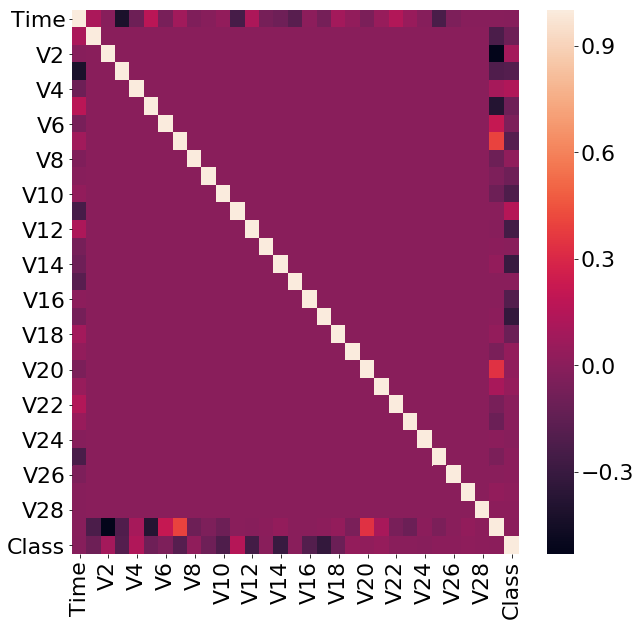

In [287]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr())

In [288]:
df.corr()['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

Some noticeable features that are correlated are V4(0.13), V11(0.15), V17(-0.33), V12(-0.26). Another thing to note is that the <b>Amount</b> column doesn't contribute to the fact whether the transaction is normal or fraud since the correlation is quite low with a value of 0.005 and there are other features as well with much lower values like V22, V25, V26 which can be removed, but for now we will keep them all.

### 2.2 Check missing values

In [289]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no features that are missing values which is good. But let's also check the statistics of the columns to confirm. We observe that the min value for Amount is 0 which doesn't make sense as a transaction cannot happen without any amount being charged, so we need to see how many rows are affected by this.

In [290]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [291]:
# find rows with amount==0
AmountZero = df[df.Amount ==0]
print(len(AmountZero))

# calculate percentage
print(len(AmountZero)*100/len(df))

1825
0.6407848121710492


As we can see the rows with zero Amount are 0.64% of the dataset so we can safely remove them by filtering out.

In [292]:
cc_data_subset = df[df.Amount!=0]
len(cc_data_subset)

282982

### 2.3 Feature normalization
Features V1, V2..., V28 are already normalized. So we are left with Time and Amount features.

In [293]:
# scale Time / Amount features
from sklearn.preprocessing import StandardScaler
cc_data_subset['Time'] = StandardScaler().fit_transform(cc_data_subset['Time'].values.reshape(-1,1))
cc_data_subset['Amount'] = StandardScaler().fit_transform(cc_data_subset['Amount'].values.reshape(-1,1))



D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [294]:
# separate normal and fraud transactions

cc_data_normal = cc_data_subset[cc_data_subset.Class == 0]
cc_data_fraud = cc_data_subset[cc_data_subset.Class == 1]

print("Normal: ", cc_data_normal.shape)
print("Fraud: ", cc_data_fraud.shape)

Normal:  (282517, 31)
Fraud:  (465, 31)


In [295]:
num_of_fraud = cc_data_fraud.shape[0]
print('No. of fraud trans:',num_of_fraud)

No. of fraud trans: 465


In [296]:
# create testing dataframe with both normal and fraudulent transactions
df_testing = cc_data_normal[-num_of_fraud:] # picks last 465 normal transactions
df_testing = df_testing.append(cc_data_fraud) # appends 465 fraud transactions

# for training data we only use normal transactions
df_training = cc_data_normal[:-num_of_fraud]  # remove last 465 transactions

# 3. Model training
Unsupervised learning techniques aim at detecting anomalies/fraud by modeling the majority behavior and considering it as “normal”. Then they detect the “abnormal” or fraudulent behavior by searching for examples that do not fit well to the normal behavior. An autoencoder can be used to model the normal behavior of data and detect outliers using the reconstruction error as an indicator. In particular, one way to do so is to train it to globally reconstruct transactions in a dataset. The normal trend that is observed in the majority of transactions will be better approximated than rare events. Therefore, the reconstruction error of “normal” data will be lower than the reconstruction error of outliers.

In [297]:
from sklearn.model_selection import train_test_split

df_training = df_training.drop(['Class'], axis=1)
df_testing_labels = df_testing['Class']
df_testing = df_testing.drop(['Class'], axis=1)

x_train = df_training.values
print("x_train shape=", x_train.shape)

x_testing = df_testing.values
print("x_testing shape=", x_testing.shape)

x_train shape= (282052, 30)
x_testing shape= (930, 30)


We will create an Autoencoder neural network which is an unsupervised learning network that reproduces the inputs given to it. The main ideas is to read the input vector and encode it using an encoder neural network into a smaller dimensional vector called encoding vector. Then this smaller dimension encoder network is decoded back into the input vector. The key thing is that the input (X) and output (Y) is the same, the fit method takes (x_train, x_train).

In [298]:
# BUILD THE AUTOENCODER NN
input_dim = 30
encoding_dim = 20

input_layer = Input(shape=(input_dim,))

encoded_layer = Dense(encoding_dim, activation='relu')(input_layer)
decoded_layer = Dense(input_dim, activation='relu')(encoded_layer) # lossy recontruction with same dim as original input

autoencoder = Model(input_layer, decoded_layer)
autoencoder.compile(metrics=['accuracy'], loss='mean_squared_error',optimizer='adam')

autoencoder.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 30)]              0         
_________________________________________________________________
dense_32 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_33 (Dense)             (None, 30)                630       
Total params: 1,250
Trainable params: 1,250
Non-trainable params: 0
_________________________________________________________________


In [299]:
history = autoencoder.fit(x_train, x_train, epochs=10,batch_size=128, shuffle=True, validation_split=0.1)

Epoch 1/10
1984/1984 [==============================] - 10s 5ms/step - loss: 0.7985 - accuracy: 0.4948 - val_loss: 0.5865 - val_accuracy: 0.8329
Epoch 2/10
1984/1984 [==============================] - 10s 5ms/step - loss: 0.6101 - accuracy: 0.8655 - val_loss: 0.5659 - val_accuracy: 0.9100
Epoch 3/10
1984/1984 [==============================] - 10s 5ms/step - loss: 0.5901 - accuracy: 0.9050 - val_loss: 0.5611 - val_accuracy: 0.9112
Epoch 4/10
1984/1984 [==============================] - 10s 5ms/step - loss: 0.5869 - accuracy: 0.9104 - val_loss: 0.5578 - val_accuracy: 0.9187
Epoch 5/10
1984/1984 [==============================] - 10s 5ms/step - loss: 0.5888 - accuracy: 0.9096 - val_loss: 0.5526 - val_accuracy: 0.9180
Epoch 6/10
1984/1984 [==============================] - 10s 5ms/step - loss: 0.5920 - accuracy: 0.9147 - val_loss: 0.5510 - val_accuracy: 0.9299
Epoch 7/10
1984/1984 [==============================] - 11s 5ms/step - loss: 0.5888 - accuracy: 0.9186 - val_loss: 0.5505 - val_ac

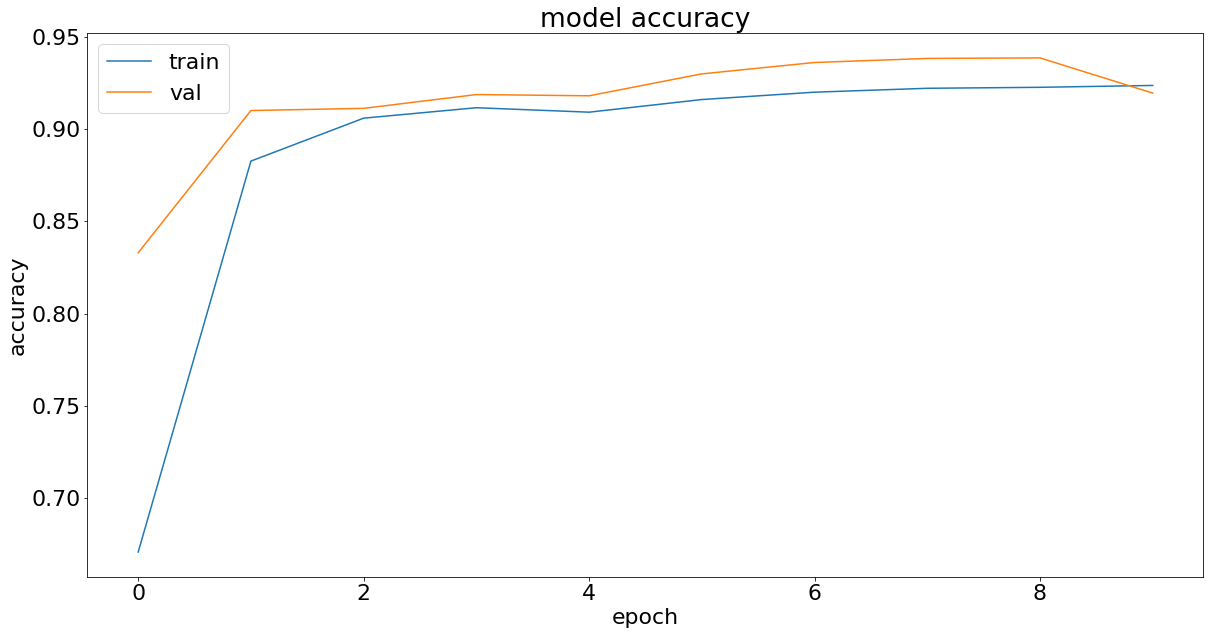

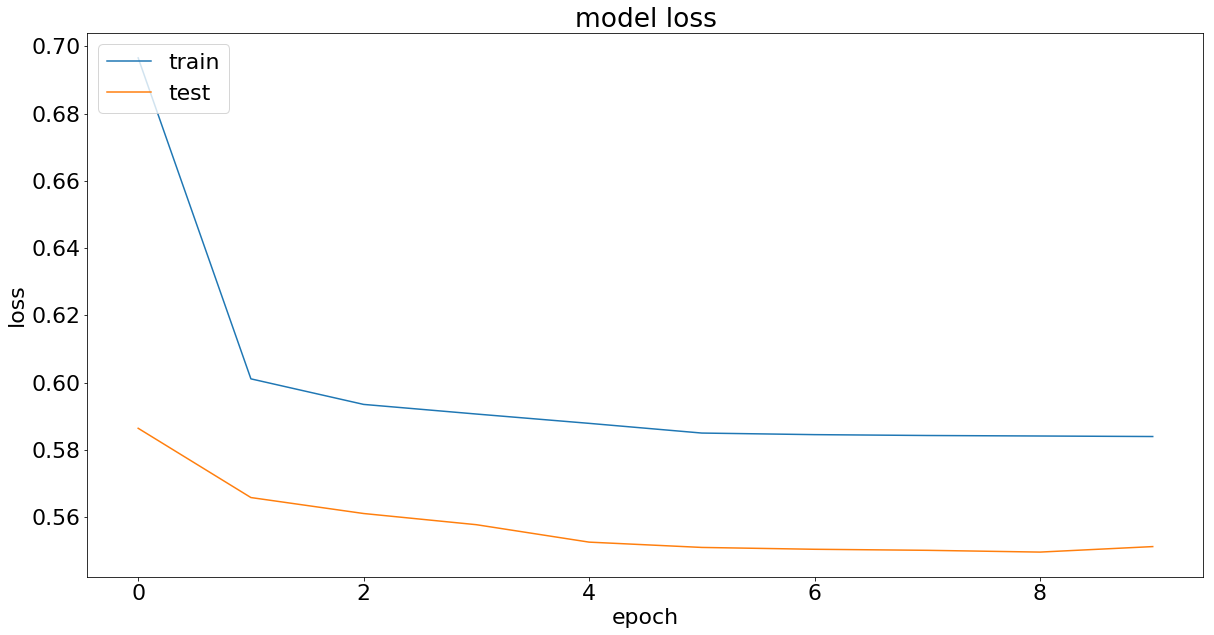

In [300]:
# summarize histroy for accuracy
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':22})
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':22})
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## 3.1 Model prediction and Reconstruction error
Let's compare the input values with predictions and calculate the reconstruction error for each data point. Since we trained on normal transactions, these should have a low reconstruction error. Fraudulent transactions will give a higher reconstruction error.

In [301]:
# use trained autoencoder to make predictions


# get predictions using model
x_predictions = autoencoder.predict(x_testing)
print(x_predictions.shape)

reconstruction_error=np.mean(np.power(x_testing - x_predictions,2), axis=1)

# create new DF with error and true class (normal/fraud)
error_df = pd.DataFrame({'Reconstruction_Error':reconstruction_error,'True_Class': df_testing_labels})

# set threshold for error
threshold_fixed = 2

error_df.head()

(930, 30)


,Reconstruction_Error,True_Class
284341,0.584521,0
284342,0.464468,0
284343,0.237984,0
284344,0.458451,0
284345,0.428290,0


In [302]:
# separate data in groups for plotting
groups = error_df.groupby('True_Class')
groups.head(100)

,Reconstruction_Error,True_Class
284341,0.584521,0
284342,0.464468,0
284343,0.237984,0
284344,0.458451,0
284345,0.428290,0
284346,0.163590,0
284347,0.172895,0
284348,0.172677,0
284349,0.571701,0
284350,0.279621,0


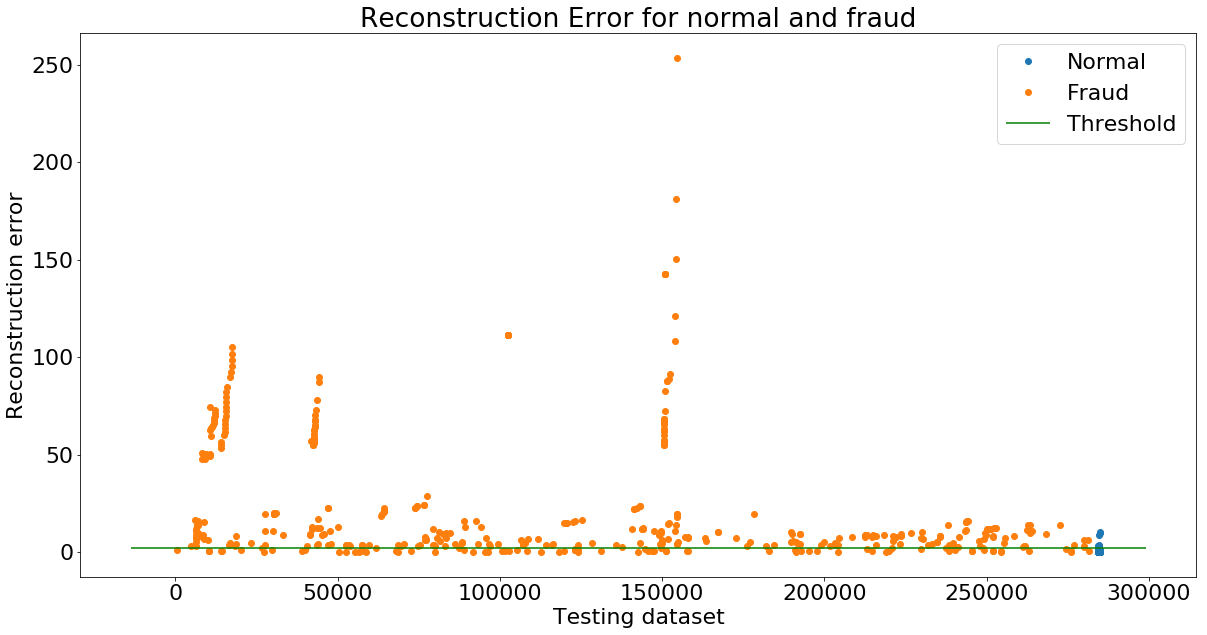

In [303]:

# plot the chart
fix, ax = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size':22})

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_Error, marker='o', ms=6, linestyle='', label="Fraud" if name==1 else "Normal")

ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="g", zorder=100, label='Threshold')
ax.legend()

plt.title('Reconstruction Error for normal and fraud')
plt.ylabel('Reconstruction error')
plt.xlabel('Testing dataset')
plt.show()

## 3.2 Accuracy, Precision & Recall
For tasks with unbalanced datasets, it's recommended practice to use Precision and Recall as metrics to guage how the model is performing so that's what we are going to calculate next.

In [304]:
print('Normal: ', len(error_df[error_df.True_Class==0]))
print('Fraud: ', len(error_df[error_df.True_Class==1]))

correct_normal = error_df[(error_df.True_Class==0) & (error_df.Reconstruction_Error <=threshold_fixed)]
print('Correct classified normal (TN):', len(correct_normal))
correct_fraud = error_df[(error_df.True_Class==1) & (error_df.Reconstruction_Error > threshold_fixed)]
print('Correct classified fraud (TP):', len(correct_fraud))

incorrect_normal = error_df[(error_df.True_Class==0) & (error_df.Reconstruction_Error > threshold_fixed)]
print('Incorrect classified normal (FN):', len(incorrect_normal))
incorrect_fraud = error_df[(error_df.True_Class==1) & (error_df.Reconstruction_Error <= threshold_fixed)]
print('Incorrect classified fraud (FP):', len(incorrect_fraud))

print('Accuracy = ', (len(correct_fraud) + len(correct_normal))/(len(correct_fraud) + len(correct_normal) + len(incorrect_normal) + len(incorrect_fraud)))
print('Precision = ', len(correct_fraud)/(len(correct_fraud)+ len(incorrect_fraud)))
print('Recall = ', len(correct_fraud)/(len(correct_fraud)+ len(incorrect_normal)))

Normal:  465
Fraud:  465
Correct classified normal (TN): 449
Correct classified fraud (TP): 387
Incorrect classified normal (FN): 16
Incorrect classified fraud (FP): 78
Accuracy =  0.8989247311827957
Precision =  0.832258064516129
Recall =  0.9602977667493796


# 4. Summary and conclusion
To conclude, it's interesting to see that even though our dataset is highly unbalanced, with autoencoders which use unsupervised learning we are able to get detect fraud cases with good performance as evident from the metrics. As part of future exploration, it would make sense to compare it with other supervised learning algorithms and evaluate the results.

# References
1. Keras to Kubernetes: The Journey of a Machine Learning Model to Production book by DattaRaj Rao